# Step-by-step Explanation of Performing LDA on the Wine Quality Dataset

### Import the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import time

### Load the dataset

In [2]:
data = pd.read_csv("D:/winequality.csv")
df = data.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Import the standardization tool

In [3]:
scaler = StandardScaler()

In [4]:
X = df.iloc[:,0:11].values
y = df.iloc[:,11].values

X_std = scaler.fit_transform(X)

In [5]:
print(y)

[5 5 5 ... 6 5 6]


### Calculate the class means

In [5]:
np.set_printoptions(precision=1)

mean_vectors=[]
for gr in range(3,9):
    mean_vectors.append(np.mean(X_std[y==gr],axis=0))
    print('Mean Vector quality %s :%s\n'%(gr,mean_vectors[gr-3]))

Mean Vector quality 3 :[ 0.   2.  -0.5  0.1  0.7 -0.5 -0.7  0.4  0.6 -0.5 -0.4]

Mean Vector quality 4 :[-0.3  0.9 -0.5  0.1  0.1 -0.3 -0.3 -0.1  0.5 -0.4 -0.1]

Mean Vector quality 5 :[-0.1  0.3 -0.1 -0.   0.1  0.1  0.3  0.2 -0.  -0.2 -0.5]

Mean Vector quality 6 :[ 0.  -0.2  0.  -0.  -0.1 -0.  -0.2 -0.1  0.   0.1  0.2]

Mean Vector quality 7 :[ 0.3 -0.7  0.5  0.1 -0.2 -0.2 -0.3 -0.3 -0.1  0.5  1. ]

Mean Vector quality 8 :[ 0.1 -0.6  0.6  0.  -0.4 -0.2 -0.4 -0.8 -0.3  0.6  1.6]



# Calculating the Within- and Between-Class Scatter Matrices

### Calculate the within-class scatter matrix

In [7]:
S_w = np.zeros((11,11))

for gr,mv in zip(range(3,9),mean_vectors):
    class_sc_mat=np.zeros((11,11))
    
    for row in X_std[y==gr]:
        
        row,mv = row.reshape(11,1), mv.reshape(11,1)
        class_sc_mat+=(row-mv).dot((row-mv).T)

    S_w+=class_sc_mat
print('Within class-scatter matrix:\n',S_w)

Within class-scatter matrix:
 [[ 1.6e+03 -3.3e+02  1.0e+03  1.8e+02  1.7e+02 -2.3e+02 -1.4e+02  1.1e+03
  -1.1e+03  2.4e+02 -2.0e+02]
 [-3.3e+02  1.3e+03 -7.4e+02  1.1e+01  1.7e+01 -3.9e+01  2.3e+01 -6.5e+01
   3.3e+02 -2.6e+02 -4.3e+01]
 [ 1.0e+03 -7.4e+02  1.5e+03  2.2e+02  3.7e+02 -7.7e+01  1.2e+02  6.5e+02
  -8.4e+02  4.1e+02 -7.7e-01]
 [ 1.8e+02  1.1e+01  2.2e+02  1.6e+03  9.3e+01  3.1e+02  3.3e+02  5.8e+02
  -1.4e+02  1.9e-01  4.6e+01]
 [ 1.7e+02  1.7e+01  3.7e+02  9.3e+01  1.6e+03 -4.9e+00  3.4e+01  2.8e+02
  -4.3e+02  6.5e+02 -2.5e+02]
 [-2.3e+02 -3.9e+01 -7.7e+01  3.1e+02 -4.9e+00  1.6e+03  1.0e+03 -6.5e+01
   1.2e+02  1.1e+02 -3.7e+01]
 [-1.4e+02  2.3e+01  1.2e+02  3.3e+02  3.4e+01  1.0e+03  1.5e+03  3.8e+01
  -9.3e+01  1.5e+02 -1.3e+02]
 [ 1.1e+03 -6.5e+01  6.5e+02  5.8e+02  2.8e+02 -6.5e+01  3.8e+01  1.5e+03
  -5.5e+02  3.1e+02 -6.3e+02]
 [-1.1e+03  3.3e+02 -8.4e+02 -1.4e+02 -4.3e+02  1.2e+02 -9.3e+01 -5.5e+02
   1.6e+03 -3.0e+02  3.5e+02]
 [ 2.4e+02 -2.6e+02  4.1e+02  1.9e

### Calculate the between-class scatter matrix

In [8]:
overall_mean = np.mean(X_std, axis=0)
c=0
S_b=np.zeros((11,11))
for i, mean_vec in enumerate(mean_vectors):
    n=X_std[y==i+3,:].shape[0]
    c+=1
    mean_vec=mean_vec.reshape(11,1)
    overall_mean=overall_mean.reshape(11,1)
    S_b+=n*(mean_vec-overall_mean).dot((mean_vec-overall_mean).T)
  
print('Between class scatter matrix:\n',S_b)

Between class scatter matrix:
 [[  30.9  -78.1   52.     6.4  -23.8  -12.6  -38.   -33.7  -13.6   52.6
    99.5]
 [ -78.1  256.6 -142.7   -7.9   81.    22.    99.4  100.7   42.5 -154.7
  -280.3]
 [  52.  -142.7   93.1   11.   -45.9  -20.2  -60.6  -63.1  -27.9   93.6
   176.5]
 [   6.4   -7.9   11.     5.3   -4.3   -7.    -8.1   -8.5   -1.5    8.7
    21.7]
 [ -23.8   81.   -45.9   -4.3   29.7   13.8   42.    40.8    9.4  -52.6
  -104.3]
 [ -12.6   22.   -20.2   -7.    13.8   23.5   46.4   30.1   -8.4  -27.7
   -73.7]
 [ -38.    99.4  -60.6   -8.1   42.    46.4  118.4   75.6  -13.2  -85.8
  -196.9]
 [ -33.7  100.7  -63.1   -8.5   40.8   30.1   75.6   64.5    5.5  -75.4
  -162. ]
 [ -13.6   42.5  -27.9   -1.5    9.4   -8.4  -13.2    5.5   21.5  -19.
   -20.8]
 [  52.6 -154.7   93.6    8.7  -52.6  -27.7  -85.8  -75.4  -19.   104.5
   204.9]
 [  99.5 -280.3  176.5   21.7 -104.3  -73.7 -196.9 -162.   -20.8  204.9
   426.4]]


### Find the eigenvectors and eigenvalues pairs 

In [9]:
eig_vals,eig_vecs=np.linalg.eig(np.linalg.inv(S_w).dot(S_b))

for i in range(len(eig_vals)):
    eigvec_sc=eig_vecs[:,i].reshape(11,1)
    print('\nEigenvector {}:\n{}'.format(i+1,eigvec_sc.real))
    print('\nEigenvalue {:}:{:.2e}'.format(i+1,eig_vals[i].real))


Eigenvector 1:
[[-0.2]
 [ 0.4]
 [ 0. ]
 [-0.1]
 [ 0.2]
 [-0.1]
 [ 0.3]
 [ 0.2]
 [ 0. ]
 [-0.4]
 [-0.7]]

Eigenvalue 1:6.32e-01

Eigenvector 2:
[[ 0.5]
 [ 0.5]
 [ 0.2]
 [ 0.2]
 [ 0.1]
 [-0. ]
 [-0.3]
 [-0.5]
 [ 0.4]
 [ 0.1]
 [-0.1]]

Eigenvalue 2:7.64e-02

Eigenvector 3:
[[-0.1]
 [-0.3]
 [-0.4]
 [-0.2]
 [ 0.1]
 [ 0.4]
 [-0.5]
 [ 0.5]
 [ 0.1]
 [-0.1]
 [ 0.1]]

Eigenvalue 3:2.48e-02

Eigenvector 4:
[[-0.7]
 [ 0.2]
 [ 0.1]
 [-0.2]
 [-0.1]
 [ 0.1]
 [-0.1]
 [ 0.4]
 [-0.4]
 [ 0. ]
 [ 0.3]]

Eigenvalue 4:6.43e-03

Eigenvector 5:
[[-0.2]
 [ 0.3]
 [ 0.3]
 [-0.4]
 [ 0.2]
 [ 0.4]
 [-0.2]
 [ 0.5]
 [-0.2]
 [-0.1]
 [ 0.4]]

Eigenvalue 5:4.18e-03

Eigenvector 6:
[[-0.6]
 [-0.1]
 [ 0. ]
 [ 0.1]
 [ 0. ]
 [-0.2]
 [ 0. ]
 [ 0.7]
 [-0.2]
 [-0.1]
 [ 0.4]]

Eigenvalue 6:1.35e-16

Eigenvector 7:
[[ 0.4]
 [-0. ]
 [-0.2]
 [-0.1]
 [-0.2]
 [ 0.1]
 [-0.2]
 [-0.2]
 [-0.3]
 [-0.5]
 [ 0. ]]

Eigenvalue 7:-5.46e-18

Eigenvector 8:
[[ 0.4]
 [-0. ]
 [-0.2]
 [-0.1]
 [-0.2]
 [ 0.1]
 [-0.2]
 [-0.2]
 [-0.3]
 [-0.5]
 [ 0. ]

### Order the eigenpairs in descending order with respect to the eigenvalues

In [10]:
eig_pairs=[]
for i in range(len(eig_vals)):
    if eig_vals[i]<0:
        eig_pairs.append((-eig_vals[i],-eig_vecs[:,i]))
    else:
        eig_pairs.append((eig_vals[i],eig_vecs[:,i]))
eig_pairs=sorted(eig_pairs,key=lambda k: k[0], reverse=True)

print('Evalues in decreasing order:\n')
for i in range(len(eig_pairs)):
    print('Evalue:\n')
    print(eig_pairs[i][0].real)
    print('\n')
    print('Associated evector:\n')
    print(eig_pairs[i][1].real)
    print('\n')

Evalues in decreasing order:

Evalue:

0.6318983806659391


Associated evector:

[-0.2  0.4  0.  -0.1  0.2 -0.1  0.3  0.2  0.  -0.4 -0.7]


Evalue:

0.07644038712342204


Associated evector:

[ 0.5  0.5  0.2  0.2  0.1 -0.  -0.3 -0.5  0.4  0.1 -0.1]


Evalue:

0.024797465211396037


Associated evector:

[-0.1 -0.3 -0.4 -0.2  0.1  0.4 -0.5  0.5  0.1 -0.1  0.1]


Evalue:

0.006428277646001732


Associated evector:

[-0.7  0.2  0.1 -0.2 -0.1  0.1 -0.1  0.4 -0.4  0.   0.3]


Evalue:

0.004179959145044487


Associated evector:

[-0.2  0.3  0.3 -0.4  0.2  0.4 -0.2  0.5 -0.2 -0.1  0.4]


Evalue:

1.3546643746695325e-16


Associated evector:

[-0.6 -0.1  0.   0.1  0.  -0.2  0.   0.7 -0.2 -0.1  0.4]


Evalue:

1.5312416455780748e-17


Associated evector:

[ 0.7  0.1 -0.4 -0.2 -0.2 -0.1  0.3 -0.3  0.1  0.3 -0.1]


Evalue:

9.858790407946448e-18


Associated evector:

[ 0.7  0.1 -0.4 -0.3 -0.2 -0.2  0.3 -0.2  0.1  0.2 -0.1]


Evalue:

9.858790407946448e-18


Associated evector:

[ 0.7  0.1 -0.4 -0

# Analysis of LDA

### Show the explained variance by each respective eigenvector

In [11]:
print('Variance explained:\n')
eigv_sum = sum(eig_vals)
for i,j in enumerate(eig_pairs):
    print('eigenvalue {0:}: {1:.2%}'.format(i+1, (j[0].real/eigv_sum.real)))  

Variance explained:

eigenvalue 1: 84.96%
eigenvalue 2: 10.28%
eigenvalue 3: 3.33%
eigenvalue 4: 0.86%
eigenvalue 5: 0.56%
eigenvalue 6: 0.00%
eigenvalue 7: 0.00%
eigenvalue 8: 0.00%
eigenvalue 9: 0.00%
eigenvalue 10: 0.00%
eigenvalue 11: 0.00%


### Take the first two eigenvectors retaining the most variance

In [12]:
W = np.hstack((eig_pairs[0][1].reshape(11,1), eig_pairs[1][1].reshape(11,1)))
print('Matrix W:\n', W.real)

Matrix W:
 [[-0.2  0.5]
 [ 0.4  0.5]
 [ 0.   0.2]
 [-0.1  0.2]
 [ 0.2  0.1]
 [-0.1 -0. ]
 [ 0.3 -0.3]
 [ 0.2 -0.5]
 [ 0.   0.4]
 [-0.4  0.1]
 [-0.7 -0.1]]


### Project the data onto the new axes (linear discriminants)

In [36]:
X_lda = X_std.dot(W)

In [37]:
X_lda.shape

(1599, 2)

In [14]:
X_std.shape

(1599, 11)

In [38]:
X.shape

(1599, 11)

In [39]:
X_lda

array([[ 1.4+0.j,  0.3+0.j],
       [ 1.2+0.j,  0.2+0.j],
       [ 1. +0.j,  0.1+0.j],
       ...,
       [-0.7+0.j, -0.3+0.j],
       [ 0.3+0.j,  0.4+0.j],
       [-0.8+0.j, -0.4+0.j]])

In [16]:
X_lda.shape

(1599, 2)

### Plot the dataset after performing LDA

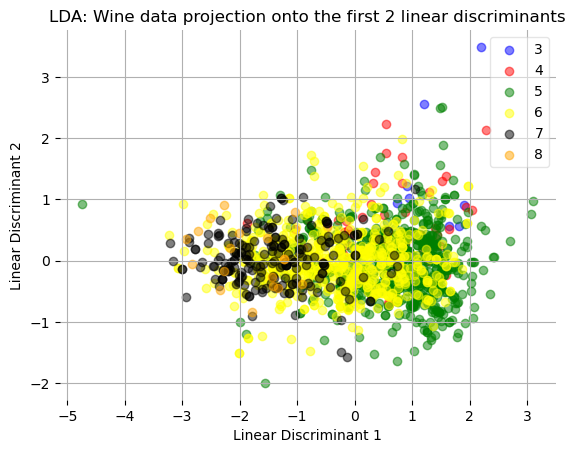

In [17]:
def plot_step_lda():
    fig=plt.figure()
    
    ax = plt.subplot(111)
    
    for label,color in zip(
        range(3,9),('blue', 'red', 'green','yellow','black','orange')):

        plt.scatter(x=X_lda[:,0].real[y == label],
                y=X_lda[:,1].real[y == label],
                
               color=color,
                alpha=0.5,
                label=label
               )
       
    plt.xlabel('Linear Discriminant 1')
    plt.ylabel('Linear Discriminant 2')
    
    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title('LDA: Wine data projection onto the first 2 linear discriminants')
 
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.show()

plot_step_lda()

### For comparison add the plot when using PCA

In [18]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

### Plot the dataset after perfoming PCA 

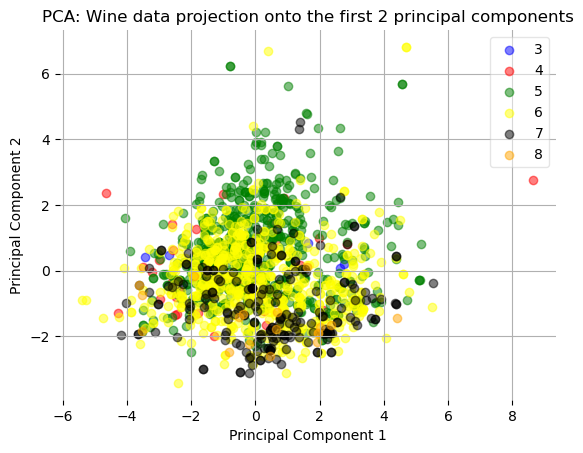

In [19]:
def plot_step_pca():
    fig=plt.figure()

    ax = plt.subplot(111)
    for label,color in zip(
            range(3,9),('blue', 'red', 'green','yellow','black','orange')):

            plt.scatter(x=X_pca[:,0].real[y == label],
                    y=X_pca[:,1].real[y == label],
                
                    color=color,
                    alpha=0.5,
                    label=label
                    )

    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    leg = plt.legend(loc='upper right', fancybox=True)
    leg.get_frame().set_alpha(0.5)
    plt.title("PCA: Wine data projection onto the first 2 principal components")
    
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.show() 
plot_step_pca()

### Split the dataset into training and testing part

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [21]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Perform LDA with 2 *linear discriminants* and store the respective results from the training and testing parts

In [22]:
lda = LDA(n_components=2)

In [23]:
X_train_lda=lda.fit_transform(X_train,y_train)

In [24]:
X_test_lda=lda.transform(X_test)

### Perform PCA with 2 *principal components* and store the respective results from the training and testing parts

In [25]:
pca = PCA(n_components=2)

In [26]:
X_train_pca=pca.fit_transform(X_train)

In [27]:
X_test_pca=pca.transform(X_test)

### Import the classifier 

In [28]:
svclassifier = SVC(kernel='linear')

### Run the classifier through the LDA train and test sets and return the neccessary time for training and testing

In [40]:
def train_test_lda():
    s=[]
    start_train_lda=time.time()
    svclassifier.fit(X_train_lda,y_train)
    finish_train_lda=time.time()
    
    start_test_lda=time.time()
    y_pred_lda=svclassifier.predict(X_test_lda)
    finish_test_lda=time.time()
  
    s.append(finish_train_lda-start_train_lda)
    s.append(finish_test_lda-start_test_lda)
    s.append(y_pred_lda)

    return s

### Run the classifier through the PCA train and test sets and return the neccessary time for training and testing

In [30]:
def train_test_pca():
    l=[]
    start_train_pca=time.time()
    svclassifier.fit(X_train_pca,y_train)
    finish_train_pca=time.time()
    
    start_test_pca=time.time()
    y_pred_pca=svclassifier.predict(X_test_pca)
    finish_test_pca=time.time()
  
    l.append(finish_train_pca-start_train_pca)
    l.append(finish_test_pca-start_test_pca)
    l.append(y_pred_pca)
    
    return l

# Analysis of the Training and Testing Times for the Classifier and Its Accuracy

In [31]:
train_lda=0
test_lda=0
for i in range(10):
    
    c=train_test_lda()
    train_lda+=c[0]
    test_lda+=c[1]
    
print('Average time for training out of 10 runs for LDA:{}'.format(train_lda/10))
print('Average time for testing out of 10 runs for LDA:{}'.format(test_lda/10))

Average time for training out of 10 runs for LDA:0.23178884983062745
Average time for testing out of 10 runs for LDA:0.04544782638549805


In [32]:
train_pca=0
test_pca=0
for i in range(10):
    
    m=train_test_pca()
    train_pca+=m[0]
    test_pca+=m[1]
    
print('Average time for training out of 10 runs for PCA:{}'.format(train_pca/10))
print('Average time for testing out of 10 runs for PCA:{}'.format(test_pca/10))

Average time for training out of 10 runs for PCA:0.13569841384887696
Average time for testing out of 10 runs for PCA:0.021167659759521486


In [33]:
a = train_test_lda()
b = train_test_pca()

### Print out the confussion matrix for the LDA test set

In [34]:
cm_lda = confusion_matrix(y_test,a[2])
print('Confussion matrix for LDA:\n')
print(cm_lda)
print('\n')
print('LDA Accuracy:'+' '+ str(accuracy_score(y_test,a[2])))

Confussion matrix for LDA:

[[  0   0   2   0   0   0]
 [  0   0   6   5   0   0]
 [  0   0 107  28   0   0]
 [  0   0  45  97   0   0]
 [  0   0   1  26   0   0]
 [  0   0   0   3   0   0]]


LDA Accuracy: 0.6375


### Print out the confussion matrix for the PCA test set

In [35]:
cm_pca = confusion_matrix(y_test,b[2])
print('Confussion matrix for PCA:\n')
print(cm_pca)
print('\n')
print('PCA Accuracy:'+' '+ str(accuracy_score(y_test,b[2])))

Confussion matrix for PCA:

[[ 0  0  0  2  0  0]
 [ 0  0  4  7  0  0]
 [ 0  0 87 48  0  0]
 [ 0  0 54 88  0  0]
 [ 0  0  4 23  0  0]
 [ 0  0  0  3  0  0]]


PCA Accuracy: 0.546875
